In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna
from scipy.interpolate import RegularGridInterpolator

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [37]:
ac_name = 'stca'

traj = dict()

for case in ['V2', 'Vmax']:

    traj[case] = pd.read_csv('../cases/'+ac_name+'/trajectory/PTCB/'+case+'/trajectory_'+ac_name+'_ptcb_'+case+'.csv')


-0.04561679211020442 0.009672209835566825
-0.0692186127610529 0.012744588028495207


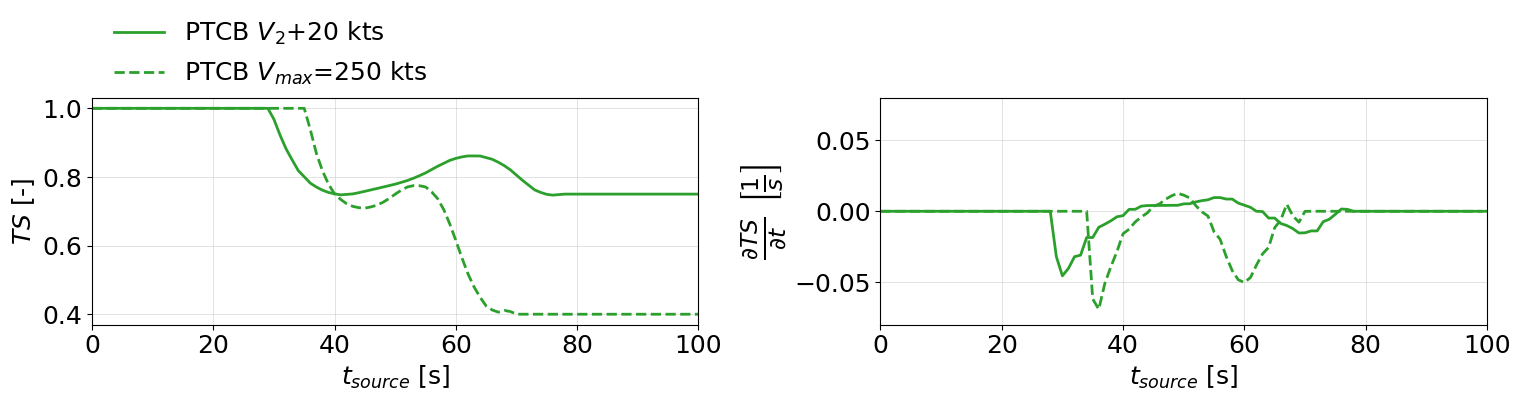

In [38]:
fig, ax = plt.subplots(1,2, figsize=(18,3))
plt.style.use('../utils/plot.mplstyle')

ax[0].plot(traj['V2']['t_source [s]'], traj['V2']['TS [-]'], '-', color='tab:green', label='PTCB $V_2$+20 kts')
ax[0].plot(traj['Vmax']['t_source [s]'], traj['Vmax']['TS [-]'], '--', color='tab:green', label='PTCB $V_{max}$=250 kts')
ax[0].set_xlim([0, 100])
ax[0].set_xlabel('$t_{source}$ [s]')
ax[0].set_ylabel('$TS$ [-]')
ax[0].legend(loc='lower left', bbox_to_anchor=(0, 0.95), frameon=False)

ax[1].plot(traj['V2']['t_source [s]'][:-1], np.diff(traj['V2']['TS [-]'])/np.diff(traj['V2']['t_source [s]']), '-', color='tab:green')
ax[1].plot(traj['Vmax']['t_source [s]'][:-1], np.diff(traj['Vmax']['TS [-]'])/np.diff(traj['Vmax']['t_source [s]']), '--', color='tab:green')
ax[1].set_xlim([0, 100])
ax[1].set_ylim([-0.08, 0.08])
ax[1].set_xlabel('$t_{source}$ [s]')
ax[1].set_ylabel(r'$\frac{\partial TS}{\partial t}\ \left[\frac{1}{s}\right]$', fontsize=24)

plt.subplots_adjust(wspace=0.3)

print(np.min(np.diff(traj['V2']['TS [-]'])/np.diff(traj['V2']['t_source [s]'])), np.max(np.diff(traj['V2']['TS [-]'])/np.diff(traj['V2']['t_source [s]'])))
print(np.min(np.diff(traj['Vmax']['TS [-]'])/np.diff(traj['Vmax']['t_source [s]'])), np.max(np.diff(traj['Vmax']['TS [-]'])/np.diff(traj['Vmax']['t_source [s]'])))

In [168]:
# Compute full thrust
F_n_interp = RegularGridInterpolator((py.engine.deck['z'], py.engine.deck['M_0'], py.engine.deck['TS']), py.engine.deck['F_n'])


F_n_full_v2   = F_n_interp(( np.maximum(np.ones(np.size(traj['v2']['ptcb']['Z [m]'].values)), traj['v2']['ptcb']['Z [m]'].values), traj['v2']['ptcb']['M_0 [-]'].values, np.ones(np.size(traj['v2']['ptcb']['Z [m]'].values))))
F_n_full_vmax = F_n_interp(( np.maximum(np.ones(np.size(traj['vmax']['ptcb']['Z [m]'].values)), traj['vmax']['ptcb']['Z [m]'].values), traj['vmax']['ptcb']['M_0 [-]'].values, np.ones(np.size(traj['vmax']['ptcb']['Z [m]'].values))))

